# Análise dos motores a 190 metros por minuto

In [1]:
#Importando as bibliotecas necessárias
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from SEC_ANALYSIS import *

In [2]:
#Carregando dataset
data190 = pd.read_excel('Data_Set_Regressao_6.xlsx')

In [3]:
#Dados resumidos
data190.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2021-03-01 00:00:00.112,145.988844,150.112594,149.588070,151.333223,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-01 00:00:01.348,145.333596,149.602304,150.737152,151.297747,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-01 00:00:02.049,145.241375,149.558651,150.464358,150.783715,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-01 00:00:03.349,145.937183,150.032650,149.646428,152.027451,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-01 00:00:04.029,145.900268,149.697587,150.371697,151.034176,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Total de linhas
data190.shape[0]

5178

In [5]:
#Removendo colunas desnecessárias
data190.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True) 

In [6]:
#Removendo linhas com valor de set point igual a 150. Nesta análise, só interessa os de 190.
data190.drop(data190.loc[data190['Set_Point']==150].index, inplace=True)

In [7]:
data190.shape[0]

3830

In [8]:
data190.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1348,2021-01-28 02:04:59.748,191.579505,188.881900,188.043735,190.554928,4,0,190,E,5
1349,2021-01-28 02:05:00.761,179.079229,188.196352,188.000072,189.871683,4,0,190,E,5
1350,2021-01-28 02:05:01.761,176.258171,188.600934,193.030308,190.812542,4,0,190,E,5
1351,2021-01-28 02:05:02.858,181.602017,188.666839,190.730875,190.109311,4,0,190,E,5
1352,2021-01-28 02:05:03.765,179.478712,188.638147,191.365530,190.262019,4,0,190,E,5


In [9]:
data190.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
5173,2021-03-10 04:38:37.966,183.608402,188.708229,191.361884,191.278107,8,0,190,E,5
5174,2021-03-10 04:38:39.260,183.163249,188.388229,189.453394,186.615889,8,0,190,E,5
5175,2021-03-10 04:38:40.018,185.444352,187.568599,190.225367,190.044304,8,0,190,E,5
5176,2021-03-10 04:38:40.891,182.766203,187.360502,184.377795,190.178814,8,0,190,E,5
5177,2021-03-10 04:38:41.964,16.582312,0.000000,1374.318553,12.292699,8,1,190,E,5


In [10]:
data2=data190.copy()

In [11]:
print(data2['BasicVariables/SEC_Velocidade_P2_PV'])

1348    191.579505
1349    179.079229
1350    176.258171
1351    181.602017
1352    179.478712
           ...    
5173    183.608402
5174    183.163249
5175    185.444352
5176    182.766203
5177     16.582312
Name: BasicVariables/SEC_Velocidade_P2_PV, Length: 3830, dtype: float64


In [12]:
#Estatística descritiva do conjunto
data190.describe()

,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Soma
count,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.0,3830.0
mean,183.266956,188.899477,191.442757,189.917754,7.296867,0.001305,190.0,5.0
std,20.182049,20.067837,38.261339,6.989738,1.214677,0.036113,0.0,0.0
min,0.736617,0.000000,0.000008,0.000000,4.000000,0.000000,190.0,5.0
25%,181.964201,187.985741,189.504543,189.343916,7.000000,0.000000,190.0,5.0
50%,183.006730,188.708127,190.275625,190.170537,8.000000,0.000000,190.0,5.0
75%,184.145311,189.578409,191.085189,191.016669,8.000000,0.000000,190.0,5.0
max,1374.323603,1370.342938,1374.318553,200.294893,8.000000,1.000000,190.0,5.0


In [13]:
#Conferindo quantidade de dados nulos no dataset
data190.isnull().sum()

BasicVariables/SEC_Velocidade_P2_PV_Timestamp    0
BasicVariables/SEC_Velocidade_P2_PV              0
BasicVariables/SEC_Velocidade_P3_PV              0
BasicVariables/SEC_Velocidade_P4_PV              0
BasicVariables/SEC_Velocidade_P5_PV              0
Set                                              0
Falha                                            0
Set_Point                                        0
Cor                                              0
Soma                                             0
dtype: int64

In [14]:
#Criando cópia do dataframe principal
data2 = data190.copy()

In [15]:
data2.shape[0]

3830

In [16]:
#Removendo outliers
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P2_PV'] - 183.10) > 25].index, inplace=True)
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P3_PV'] - 188.7) > 25].index, inplace=True)
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P4_PV'] - 193.46) > 25].index, inplace=True)
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P5_PV'] - 188.9) > 25].index, inplace=True)

In [17]:
#Verificando a quantidade de linhas após remoção de outliers
data2.shape[0]

3825

In [18]:
data2.dtypes

BasicVariables/SEC_Velocidade_P2_PV_Timestamp    datetime64[ns]
BasicVariables/SEC_Velocidade_P2_PV                     float64
BasicVariables/SEC_Velocidade_P3_PV                     float64
BasicVariables/SEC_Velocidade_P4_PV                     float64
BasicVariables/SEC_Velocidade_P5_PV                     float64
Set                                                       int64
Falha                                                     int64
Set_Point                                                 int64
Cor                                                      object
Soma                                                      int64
dtype: object

In [19]:
#Cada conjunto é referente a um dia de observações
df_s1 = data2[data2['Set']==4]
df_s1.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1348,2021-01-28 02:04:59.748,191.579505,188.881900,188.043735,190.554928,4,0,190,E,5
1349,2021-01-28 02:05:00.761,179.079229,188.196352,188.000072,189.871683,4,0,190,E,5
1350,2021-01-28 02:05:01.761,176.258171,188.600934,193.030308,190.812542,4,0,190,E,5
1351,2021-01-28 02:05:02.858,181.602017,188.666839,190.730875,190.109311,4,0,190,E,5
1352,2021-01-28 02:05:03.765,179.478712,188.638147,191.365530,190.262019,4,0,190,E,5


In [20]:
df_s1.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1622,2021-01-28 02:09:33.759,185.326838,187.924111,187.511972,190.833784,4,0,190,E,5
1623,2021-01-28 02:09:34.760,189.389722,189.156229,189.918761,190.069098,4,0,190,E,5
1624,2021-01-28 02:09:35.764,177.994977,188.187976,191.105393,190.173944,4,0,190,E,5
1625,2021-01-28 02:09:37.659,179.188879,187.759841,190.370529,190.637118,4,0,190,E,5
1626,2021-01-28 02:09:37.817,193.113620,188.425953,186.139668,189.943506,4,0,190,E,5


In [21]:
df_s2 = data2[data2['Set']==5]
df_s2.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1628,2021-02-04 03:57:59.098,185.134920,190.328812,191.697961,190.688689,5,0,190,E,5
1629,2021-02-04 03:58:00.098,178.303877,186.240184,190.167245,186.996981,5,0,190,E,5
1630,2021-02-04 03:58:01.376,181.026284,189.910815,189.737800,191.208605,5,0,190,E,5
1631,2021-02-04 03:58:02.099,182.465044,185.061806,189.413110,182.412990,5,0,190,E,5
1632,2021-02-04 03:58:03.095,185.112351,184.768717,191.110472,193.256332,5,0,190,E,5


In [22]:
df_s2.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1740,2021-02-04 03:59:51.106,178.351165,187.075727,190.390682,191.571632,5,0,190,E,5
1741,2021-02-04 03:59:52.114,185.662362,190.356091,189.880115,193.282710,5,0,190,E,5
1742,2021-02-04 03:59:53.105,184.502948,191.045468,189.834752,192.649309,5,0,190,E,5
1743,2021-02-04 03:59:54.110,184.032358,191.940751,191.290266,190.898344,5,0,190,E,5
1744,2021-02-04 03:59:55.089,184.702587,187.919114,189.791601,192.294848,5,0,190,E,5


In [23]:
df_s3 = data2[data2['Set']==6]
df_s3.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1746,2021-03-18 22:19:59.820,180.935516,183.879045,191.439811,191.247766,6,0,190,E,5
1747,2021-03-18 22:20:00.832,183.318077,192.828846,189.252710,190.265366,6,0,190,E,5
1748,2021-03-18 22:20:01.829,182.537093,185.591296,190.579180,190.251712,6,0,190,E,5
1749,2021-03-18 22:20:02.835,184.329482,187.625492,190.973870,190.482078,6,0,190,E,5
1750,2021-03-18 22:20:03.832,182.547436,183.507436,190.104044,190.113686,6,0,190,E,5


In [24]:
df_s3.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
2131,2021-03-18 22:27:23.125,181.202268,183.791841,191.258092,190.767810,6,0,190,E,5
2132,2021-03-18 22:27:24.463,182.874255,194.029056,191.036211,189.396270,6,0,190,E,5
2133,2021-03-18 22:27:25.137,181.753242,186.068767,188.712305,191.340686,6,0,190,E,5
2134,2021-03-18 22:27:27.199,181.550100,192.681636,188.600013,191.924148,6,0,190,E,5
2135,2021-03-18 22:27:27.658,187.070218,188.150231,184.282296,189.110079,6,0,190,E,5


In [25]:
df_s4 = data2[data2['Set']==7]
df_s4.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
2137,2021-02-04 21:59:59.544,179.481518,188.917064,191.691715,189.999076,7,0,190,E,5
2138,2021-02-04 22:00:00.709,183.961436,188.867707,190.602220,189.418201,7,0,190,E,5
2139,2021-02-04 22:00:01.528,190.381629,188.904632,189.084221,190.440137,7,0,190,E,5
2140,2021-02-04 22:00:02.541,189.395436,189.191987,187.531571,189.246148,7,0,190,E,5
2141,2021-02-04 22:00:03.542,177.175020,188.788941,191.234314,190.569560,7,0,190,E,5


In [26]:
df_s4.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
2568,2021-02-04 22:07:13.578,189.493064,188.611359,190.235935,189.906712,7,0,190,E,5
2569,2021-02-04 22:07:14.572,179.434004,188.713800,188.746629,190.239592,7,0,190,E,5
2570,2021-02-04 22:07:15.644,190.419087,189.049201,189.153710,189.807618,7,0,190,E,5
2571,2021-02-04 22:07:16.648,190.055997,188.540867,189.707264,190.852199,7,0,190,E,5
2572,2021-02-04 22:07:17.576,187.017605,188.672758,189.651763,190.172809,7,0,190,E,5


In [27]:
df_s5 = data2[data2['Set']==8]
df_s5.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
2574,2021-03-10 03:49:59.331,182.662656,188.600791,189.507502,190.838218,8,0,190,E,5
2575,2021-03-10 03:50:00.361,183.645839,188.069581,190.937805,191.321546,8,0,190,E,5
2576,2021-03-10 03:50:01.229,182.641439,188.337828,190.375608,189.466340,8,0,190,E,5
2577,2021-03-10 03:50:02.230,181.725573,187.909673,189.183181,189.671694,8,0,190,E,5
2578,2021-03-10 03:50:03.230,182.121308,188.356014,189.994107,189.446294,8,0,190,E,5


In [28]:
df_s5.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
5172,2021-03-10 04:38:36.890,181.433262,187.278848,189.665956,181.490449,8,0,190,E,5
5173,2021-03-10 04:38:37.966,183.608402,188.708229,191.361884,191.278107,8,0,190,E,5
5174,2021-03-10 04:38:39.260,183.163249,188.388229,189.453394,186.615889,8,0,190,E,5
5175,2021-03-10 04:38:40.018,185.444352,187.568599,190.225367,190.044304,8,0,190,E,5
5176,2021-03-10 04:38:40.891,182.766203,187.360502,184.377795,190.178814,8,0,190,E,5


In [29]:
#Selecionando valores de velocidade de cada motor e 'Set' para elaboração de gráficos
p2_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV'].tolist()
p2_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV'].tolist()
p2_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV'].tolist()
p2_4 = df_s4['BasicVariables/SEC_Velocidade_P2_PV'].tolist()
p2_5 = df_s5['BasicVariables/SEC_Velocidade_P2_PV'].tolist()

t2_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t2_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t2_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t2_4 = df_s4['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t2_5 = df_s5['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()

In [30]:
p3_1 = df_s1['BasicVariables/SEC_Velocidade_P3_PV'].tolist()
p3_2 = df_s2['BasicVariables/SEC_Velocidade_P3_PV'].tolist()
p3_3 = df_s3['BasicVariables/SEC_Velocidade_P3_PV'].tolist()
p3_4 = df_s4['BasicVariables/SEC_Velocidade_P3_PV'].tolist()
p3_5 = df_s5['BasicVariables/SEC_Velocidade_P3_PV'].tolist()

t3_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t3_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t3_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t3_4 = df_s4['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t3_5 = df_s5['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()

In [31]:
p4_1 = df_s1['BasicVariables/SEC_Velocidade_P4_PV'].tolist()
p4_2 = df_s2['BasicVariables/SEC_Velocidade_P4_PV'].tolist()
p4_3 = df_s3['BasicVariables/SEC_Velocidade_P4_PV'].tolist()
p4_4 = df_s4['BasicVariables/SEC_Velocidade_P4_PV'].tolist()
p4_5 = df_s5['BasicVariables/SEC_Velocidade_P4_PV'].tolist()

t4_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t4_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t4_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t4_4 = df_s4['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t4_5 = df_s5['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()

In [32]:
p5_1 = df_s1['BasicVariables/SEC_Velocidade_P5_PV'].tolist()
p5_2 = df_s2['BasicVariables/SEC_Velocidade_P5_PV'].tolist()
p5_3 = df_s3['BasicVariables/SEC_Velocidade_P5_PV'].tolist()
p5_4 = df_s4['BasicVariables/SEC_Velocidade_P5_PV'].tolist()
p5_5 = df_s5['BasicVariables/SEC_Velocidade_P5_PV'].tolist()

t5_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t5_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t5_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t5_4 = df_s4['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t5_5 = df_s5['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()

In [33]:
#print(len(p2_4))

---------------------------------------------------------------------------------------------------------------

# Motor 2, conjunto de dados 1:

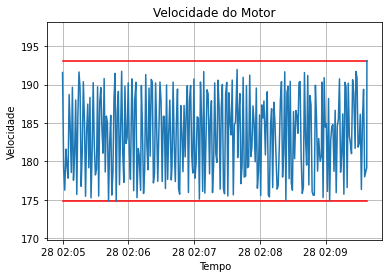

In [34]:
grafico_p2_1 = gera_grafico(t2_1, p2_1)
grafico_p2_1.show()

# Motor 3, conjunto de dados 1:

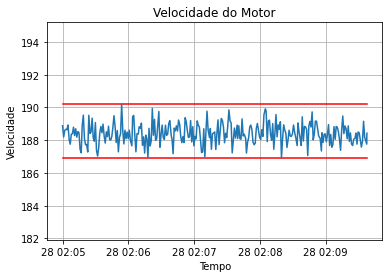

In [35]:
grafico_p3_1 = gera_grafico(t3_1, p3_1)
grafico_p3_1.show()

# Motor 4, conjunto de dados 1:

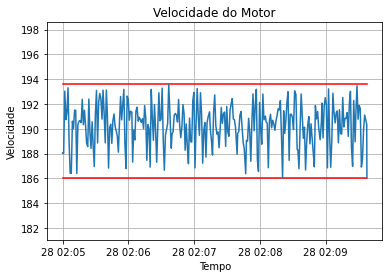

In [36]:
grafico_p4_1 = gera_grafico(t4_1, p4_1)
grafico_p4_1.show()

# Motor 5 conjunto de dados 1:

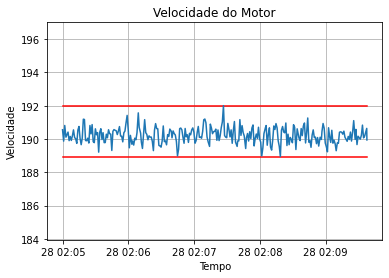

In [37]:
grafico_p5_1 = gera_grafico(t5_1, p5_1)
grafico_p5_1.show()

---------------------------------------------------------------------------------------------------------------

# Motor 2, conjunto de dados 2:

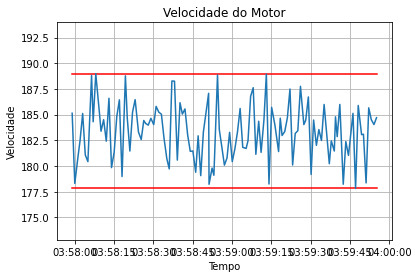

In [38]:
grafico_p2_2 = gera_grafico(t2_2, p2_2)
grafico_p2_2.show()

# Motor 3, conjunto de dados 2:

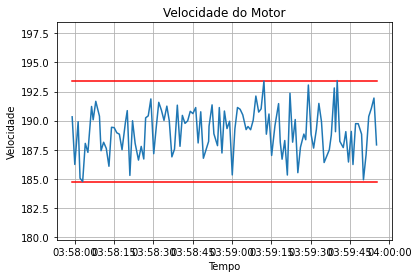

In [39]:
grafico_p3_2 = gera_grafico(t3_2, p3_2)
grafico_p3_2.show()

# Motor 4, conjunto de dados 2:

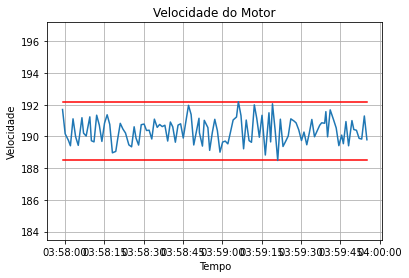

In [40]:
grafico_p4_2 = gera_grafico(t4_2, p4_2)
grafico_p4_2.show()

# Motor 5, conjunto de dados 2:

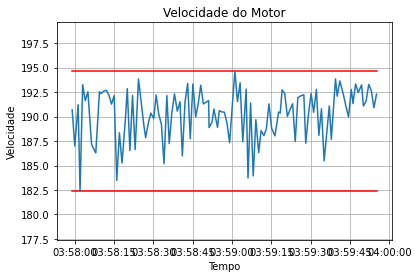

In [41]:
grafico_p5_2 = gera_grafico(t5_2, p5_2)
grafico_p5_2.show()

---------------------------------------------------------------------------------------------------------------

# Motor 2, conjunto de dados 3:

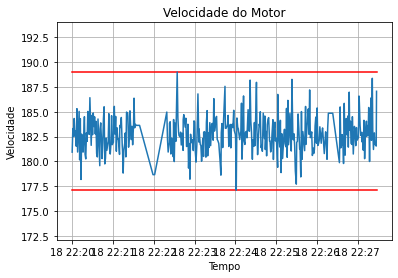

In [42]:
grafico_p2_3 = gera_grafico(t2_3, p2_3)
grafico_p2_3.show()

# Motor 3, conjunto de dados 3:

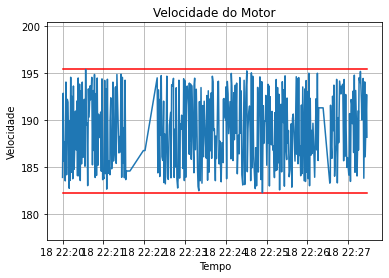

In [43]:
grafico_p3_3 = gera_grafico(t3_3, p3_3)
grafico_p3_3.show()

# Motor 4, conjunto de dados 3:

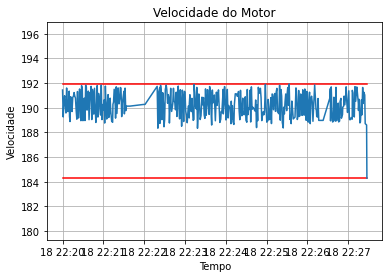

In [44]:
grafico_p4_3 = gera_grafico(t4_3, p4_3)
grafico_p4_3.show()

# Motor 5, conjunto de dados 3:

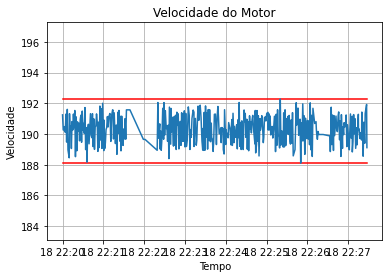

In [45]:
grafico_p5_3 = gera_grafico(t5_3, p5_3)
grafico_p5_3.show()

---------------------------------------------------------------------------------------------------------------

# Motor 2, conjunto de dados 4:

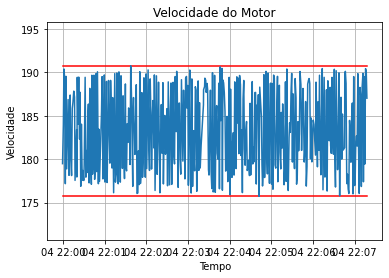

In [46]:
grafico_p2_4 = gera_grafico(t2_4, p2_4)
grafico_p2_4.show()

# Motor 3, conjunto de dados 4:

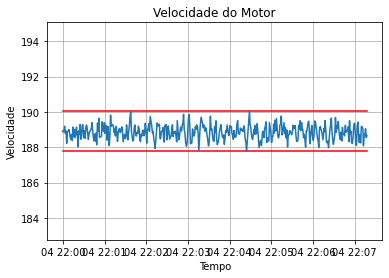

In [47]:
grafico_p3_4 = gera_grafico(t3_4, p3_4)
grafico_p3_4.show()

# Motor 4, conjunto de dados 4:

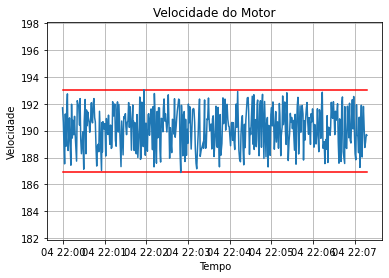

In [48]:
grafico_p4_4 = gera_grafico(t4_4, p4_4)
grafico_p4_4.show()

# Motor 5, conjunto de dados 4:

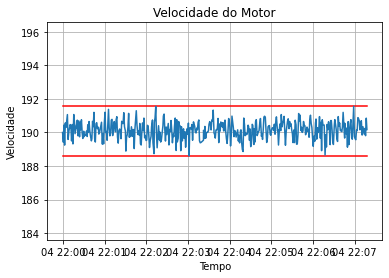

In [49]:
grafico_p5_4 = gera_grafico(t5_4, p5_4)
grafico_p5_4.show()

---------------------------------------------------------------------------------------------------------------

# Motor 2, conjunto de dados 5:

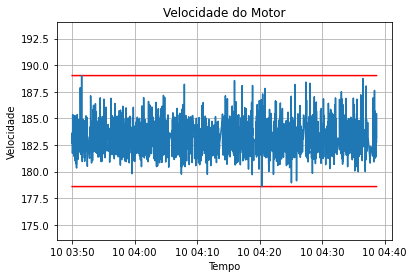

In [50]:
grafico_p2_5 = gera_grafico(t2_5, p2_5)
grafico_p2_5.show()

# Motor 3, conjunto de dados 5:

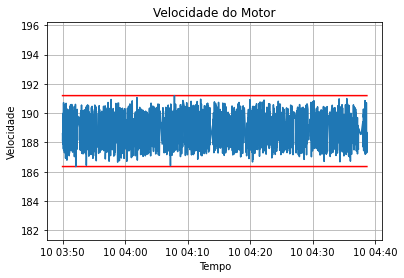

In [51]:
grafico_p3_5 = gera_grafico(t3_5, p3_5)
grafico_p3_5.show()

# Motor 4, conjunto de dados 5:

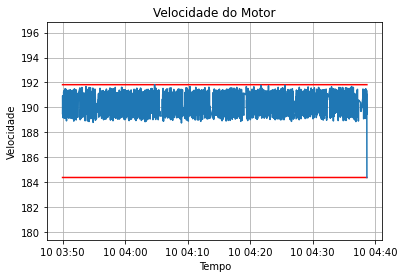

In [52]:
grafico_p4_5 = gera_grafico(t4_5, p4_5)
grafico_p4_5.show()

# Motor 5, conjunto de dados 5:

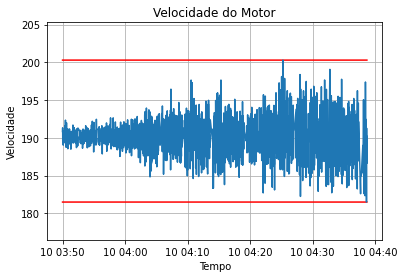

In [53]:
grafico_p5_5 = gera_grafico(t5_5, p5_5)
grafico_p5_5.show()

---------------------------------------------------------------------------------------------------------------

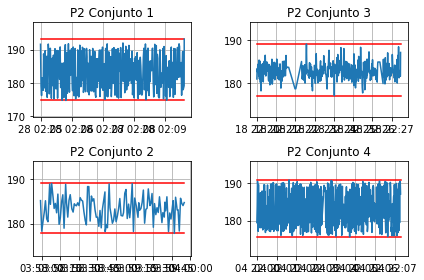

In [54]:
grafico_multiplo_p2 = gera_grafico_multiplo(t2_1, p2_1,t2_2, p2_2,t2_3, p2_3,t2_4, p2_4)
grafico_multiplo_p2.show()

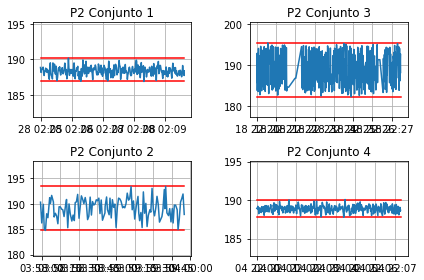

In [55]:
grafico_multiplo_p3 = gera_grafico_multiplo(t3_1, p3_1,t3_2, p3_2,t3_3, p3_3,t3_4, p3_4)
grafico_multiplo_p3.show()

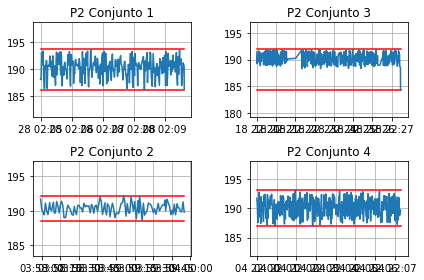

In [56]:
grafico_multiplo_p4 = gera_grafico_multiplo(t4_1, p4_1,t4_2, p4_2,t4_3, p4_3,t4_4, p4_4)
grafico_multiplo_p4.show()

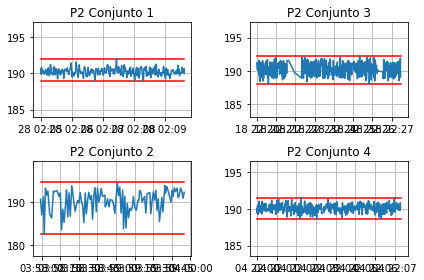

In [57]:
grafico_multiplo_p5 = gera_grafico_multiplo(t5_1, p5_1,t5_2, p5_2,t5_3, p5_3,t5_4, p5_4)
grafico_multiplo_p5.show()

In [58]:
    freq_min_p2_1,freq_max_p2_1 = calcula_frequencia_round(p2_1)
    print("O valor de Frequencia para P2 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p2_1,freq_max_p2_1))
 
    freq_min_p2_2,freq_max_p2_2 = calcula_frequencia_round(p2_2)
    print("O valor de Frequencia para P2 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p2_2,freq_max_p2_2))   
 
    freq_min_p2_3,freq_max_p2_3 = calcula_frequencia_round(p2_3)
    print("O valor de Frequencia para P2 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p2_3,freq_max_p2_3))    
 
    freq_min_p2_4,freq_max_p2_4 = calcula_frequencia_round(p2_4)
    print("O valor de Frequencia para P2 Conjunto 4: Min: {0} e Máx: {1}".format(freq_min_p2_4,freq_max_p2_4)) 
    
    freq_min_p2_5,freq_max_p2_5 = calcula_frequencia_round(p2_5)
    print("O valor de Frequencia para P2 Conjunto 5: Min: {0} e Máx: {1}".format(freq_min_p2_5,freq_max_p2_5)) 

O valor de Frequencia para P2 Conjunto 1: Min: 12 e Máx: 1
O valor de Frequencia para P2 Conjunto 2: Min: 6 e Máx: 5
O valor de Frequencia para P2 Conjunto 3: Min: 1 e Máx: 1
O valor de Frequencia para P2 Conjunto 4: Min: 20 e Máx: 2
O valor de Frequencia para P2 Conjunto 5: Min: 3 e Máx: 3


In [59]:
    freq_min_p3_1,freq_max_p3_1 = calcula_frequencia_round(p3_1)
    print("O valor de Frequencia para P3 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p3_1,freq_max_p3_1)) 
    
    freq_min_p3_2,freq_max_p3_2 = calcula_frequencia_round(p3_2)
    print("O valor de Frequencia para P3 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p3_2,freq_max_p3_2)) 
    
    freq_min_p3_3,freq_max_p3_3 = calcula_frequencia_round(p3_3)
    print("O valor de Frequencia para P3 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p3_3,freq_max_p3_3))  
    
    freq_min_p3_4,freq_max_p3_4 = calcula_frequencia_round(p3_4)
    print("O valor de Frequencia para P3 Conjunto 4: Min: {0} e Máx: {1}".format(freq_min_p3_4,freq_max_p3_4))   
    
    freq_min_p3_5,freq_max_p3_5 = calcula_frequencia_round(p3_5)
    print("O valor de Frequencia para P3 Conjunto 5: Min: {0} e Máx: {1}".format(freq_min_p3_5,freq_max_p3_5)) 

O valor de Frequencia para P3 Conjunto 1: Min: 22 e Máx: 13
O valor de Frequencia para P3 Conjunto 2: Min: 6 e Máx: 4
O valor de Frequencia para P3 Conjunto 3: Min: 2 e Máx: 21
O valor de Frequencia para P3 Conjunto 4: Min: 92 e Máx: 21
O valor de Frequencia para P3 Conjunto 5: Min: 3 e Máx: 91


In [60]:
    freq_min_p4_1,freq_max_p4_1 = calcula_frequencia_round(p4_1)
    print("O valor de Frequencia para P4 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p4_1,freq_max_p4_1)) 
    
    freq_min_p4_2,freq_max_p4_2 = calcula_frequencia_round(p4_2)
    print("O valor de Frequencia para P4 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p4_2,freq_max_p4_2)) 
    
    freq_min_p4_3,freq_max_p4_3 = calcula_frequencia_round(p4_3)
    print("O valor de Frequencia para P4 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p4_3,freq_max_p4_3))  
    
    freq_min_p4_4,freq_max_p4_4 = calcula_frequencia_round(p4_4)
    print("O valor de Frequencia para P4 Conjunto 4: Min: {0} e Máx: {1}".format(freq_min_p4_4,freq_max_p4_4))   
    
    freq_min_p4_5,freq_max_p4_5 = calcula_frequencia_round(p4_5)
    print("O valor de Frequencia para P4 Conjunto 5: Min: {0} e Máx: {1}".format(freq_min_p4_5,freq_max_p4_5)) 

O valor de Frequencia para P4 Conjunto 1: Min: 6 e Máx: 1
O valor de Frequencia para P4 Conjunto 2: Min: 1 e Máx: 7
O valor de Frequencia para P4 Conjunto 3: Min: 1 e Máx: 49
O valor de Frequencia para P4 Conjunto 4: Min: 12 e Máx: 13
O valor de Frequencia para P4 Conjunto 5: Min: 1 e Máx: 65


In [61]:
    freq_min_p5_1,freq_max_p5_1 = calcula_frequencia_round(p5_1)
    print("O valor de Frequencia para P5 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p5_1,freq_max_p5_1)) 
    
    freq_min_p5_2,freq_max_p5_2 = calcula_frequencia_round(p5_2)
    print("O valor de Frequencia para P5 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p5_2,freq_max_p5_2)) 
    
    freq_min_p5_3,freq_max_p5_3 = calcula_frequencia_round(p5_3)
    print("O valor de Frequencia para P5 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p5_3,freq_max_p5_3))  
    
    freq_min_p5_4,freq_max_p5_4 = calcula_frequencia_round(p5_4)
    print("O valor de Frequencia para P5 Conjunto 4: Min: {0} e Máx: {1}".format(freq_min_p5_4,freq_max_p5_4))  
    
    freq_min_p5_5,freq_max_p5_5 = calcula_frequencia_round(p5_5)
    print("O valor de Frequencia para P5 Conjunto 5: Min: {0} e Máx: {1}".format(freq_min_p5_5,freq_max_p5_5)) 

O valor de Frequencia para P5 Conjunto 1: Min: 15 e Máx: 2
O valor de Frequencia para P5 Conjunto 2: Min: 1 e Máx: 1
O valor de Frequencia para P5 Conjunto 3: Min: 4 e Máx: 42
O valor de Frequencia para P5 Conjunto 4: Min: 62 e Máx: 2
O valor de Frequencia para P5 Conjunto 5: Min: 1 e Máx: 1


In [62]:
'''
result = [((y-190)/190)*100 for y in p2_1]
#print(result)
print(min(result))
print(max(result))
'''

'\nresult = [((y-190)/190)*100 for y in p2_1]\n#print(result)\nprint(min(result))\nprint(max(result))\n'

In [63]:
min_var_2_1,max_var_2_1,p2_1_var = calcula_variacao_set_point(p2_1,190)
print(min_var_2_1)
print(max_var_2_1)
print(max_var_2_1-min_var_2_1)
print("---")
min_var_2_2,max_var_2_2,p2_2_var = calcula_variacao_set_point(p2_2,190)
print(min_var_2_2)
print(max_var_2_2)
print(max_var_2_2-min_var_2_2)
print("---")
min_var_2_3,max_var_2_3,p2_3_var = calcula_variacao_set_point(p2_3,190)
print(min_var_2_3)
print(max_var_2_3)
print(max_var_2_3-min_var_2_3)
print("---")
min_var_2_4,max_var_2_4,p2_4_var = calcula_variacao_set_point(p2_4,190)
print(min_var_2_4)
print(max_var_2_4)
print(max_var_2_4-min_var_2_4)
print("---")
min_var_2_5,max_var_2_5,p2_5_var = calcula_variacao_set_point(p2_5,190)
print(min_var_2_5)
print(max_var_2_5)
print(max_var_2_5-min_var_2_5)
print("---")

-8.006383831578948
1.6387476210526362
9.645131452631583
---
-6.413902147368416
-0.5351504842105208
5.878751663157896
---
-6.789483789473685
-0.5175807999999978
6.271902989473688
---
-7.5174723368421095
0.3936390736842105
7.91111141052632
---
-6.001230147368412
-0.5130536421052655
5.488176505263147
---


In [64]:
min_var_3_1,max_var_3_1,p3_1_var = calcula_variacao_set_point(p3_1,190)
print(min_var_3_1)
print(max_var_3_1)
print(max_var_3_1-min_var_3_1)
print("---")
min_var_3_2,max_var_3_2,p3_2_var = calcula_variacao_set_point(p3_2,190)
print(min_var_3_2)
print(max_var_3_2)
print(max_var_3_2-min_var_3_2)
print("---")
min_var_3_3,max_var_3_3,p3_3_var = calcula_variacao_set_point(p3_3,190)
print(min_var_3_3)
print(max_var_3_3)
print(max_var_3_3-min_var_3_3)
print("---")
min_var_3_4,max_var_3_4,p3_4_var = calcula_variacao_set_point(p3_4,190)
print(min_var_3_4)
print(max_var_3_4)
print(max_var_3_4-min_var_3_4)
print("---")
min_var_3_5,max_var_3_5,p3_5_var = calcula_variacao_set_point(p3_5,190)
print(min_var_3_5)
print(max_var_3_5)
print(max_var_3_5-min_var_3_5)
print("---")

-1.6209030736842136
0.10218711578947873
1.7230901894736923
---
-2.753306947368425
1.8109844210526287
4.5642913684210535
---
-4.081176252631585
2.820217263157893
6.9013935157894775
---
-1.1758079999999969
0.03555166315789536
1.2113596631578922
---
-1.9175720421052675
0.6304956631578905
2.548067705263158
---


In [65]:
min_var_4_1,max_var_4_1,p4_1_var = calcula_variacao_set_point(p4_1,190)
print(min_var_4_1)
print(max_var_4_1)
print(max_var_4_1-min_var_4_1)
print("---")
min_var_4_2,max_var_4_2,p4_2_var = calcula_variacao_set_point(p4_2,190)
print(min_var_4_2)
print(max_var_4_2)
print(max_var_4_2-min_var_4_2)
print("---")
min_var_4_3,max_var_4_3,p4_3_var = calcula_variacao_set_point(p4_3,190)
print(min_var_4_3)
print(max_var_4_3)
print(max_var_4_3-min_var_4_3)
print("---")
min_var_4_4,max_var_4_4,p4_4_var = calcula_variacao_set_point(p4_4,190)
print(min_var_4_4)
print(max_var_4_4)
print(max_var_4_4-min_var_4_4)
print("---")
min_var_4_5,max_var_4_5,p4_5_var = calcula_variacao_set_point(p4_5,190)
print(min_var_4_5)
print(max_var_4_5)
print(max_var_4_5-min_var_4_5)
print("---")

-2.0818324210526384
1.8848202105263119
3.9666526315789503
---
-0.7970034526315759
1.1530482526315733
1.9500517052631492
---
-3.0093177263157895
1.0161664000000015
4.025484126315791
---
-1.6358103578947316
1.5988224000000022
3.234632757894734
---
-2.9590554947368357
0.9601805473684222
3.9192360421052577
---


In [66]:
min_var_5_1,max_var_5_1,p5_1_var = calcula_variacao_set_point(p5_1,190)
print(min_var_5_1)
print(max_var_5_1)
print(max_var_5_1-min_var_5_1)
print("---")
min_var_5_2,max_var_5_2,p5_2_var = calcula_variacao_set_point(p5_2,190)
print(min_var_5_2)
print(max_var_5_2)
print(max_var_5_2-min_var_5_2)
print("---")
min_var_5_3,max_var_5_3,p5_3_var = calcula_variacao_set_point(p5_3,190)
print(min_var_5_3)
print(max_var_5_3)
print(max_var_5_3-min_var_5_3)
print("---")
min_var_5_4,max_var_5_4,p5_4_var = calcula_variacao_set_point(p5_4,190)
print(min_var_5_4)
print(max_var_5_4)
print(max_var_5_4-min_var_5_4)
print("---")
min_var_5_5,max_var_5_5,p5_5_var = calcula_variacao_set_point(p5_5,190)
print(min_var_5_5)
print(max_var_5_5)
print(max_var_5_5-min_var_5_5)
print("---")

-0.5547933911578926
1.0554710770526299
1.6102644682105225
---
-3.9931633448421016
2.4335028008421116
6.426666145684213
---
-1.000167424000004
1.2001642172631632
2.2003316412631673
---
-0.7385407056842036
0.8248663848421021
1.5634070905263058
---
-4.478710837894727
5.418364820210534
9.897075658105262
---
